In [3]:
import numpy as np
from meshplot import plot, subplot, interact
from scipy.stats import norm
import open3d as o3d
%run helpers_alg.ipynb
%run helpers_preproc.ipynb

In [4]:
mesh_dir = 'SHREC11/'
#ts = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4])
ts = np.random.random(100) * 0.01

In [3]:
adjMats = []

for i in range(600):
    fName = 'T' + str(i) + '.obj'
    adj = obj_2_adj(mesh_dir + fName)
    adjMats.append(adj)

In [4]:
lapMats = adj_mat_to_lap_mat(adjMats)

In [5]:
evals,Us = lap_mat_to_eigen(lapMats)
hkss = batch_heat_kernel_signature(ts, evals, Us)

In [6]:
disSimMat = igl.all_pairs_distances(hkss,hkss,True)

In [7]:
disSimMat = disSimMat / np.max(disSimMat)

In [8]:
label = readLbl(mesh_dir+'labels.txt')
compResult = compareGroups(0,1,label,disSimMat)
np.mean(compResult)

0.09690199187860267

In [39]:
disSimMat2 = disSimMat + np.diag(np.ones(600))
print(divmod(np.argmin(disSimMat2),600))
print(np.min(disSimMat2))
print(label[59])
print(label[191])

(59, 191)
1.878655703521759e-11
13.0
19.0


In [9]:
mat = np.empty([30,30])
compSelf = []
compOthers = []
for i in range(30):
    for j in range(0,i+1):
        compResult = compareGroups(i,j,label,disSimMat)
        mat[i,j] = compResult
        mat[j,i] = compResult
        if (i == j):
            compSelf.append(compResult)
        else:
            compOthers.append(compResult)

In [19]:
print(np.min(compSelf))
print(compOthers.index(np.min(compOthers)))

0.000746302547228787
347


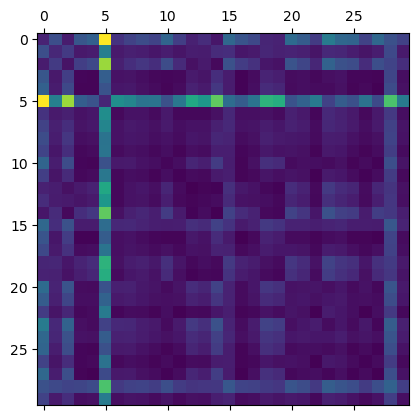

In [10]:
plt.matshow(mat)
self_mean = np.mean(compSelf)
self_std = np.std(compSelf)
others_mean = np.mean(compOthers)
others_std = np.std(compOthers)

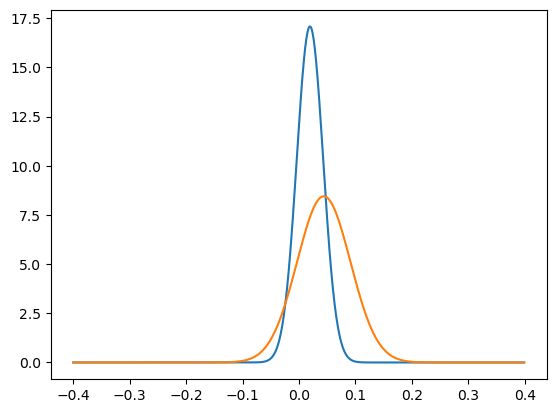

In [31]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-0.4, 0.4, 0.001)

#plt.hist(compSelf)


plt.plot(x_axis, norm.pdf(x_axis, self_mean, self_std))
plt.plot(x_axis, norm.pdf(x_axis, others_mean, others_std))
plt.show()

(array([291.,  80.,  35.,  15.,   6.,   2.,   2.,   2.,   1.,   1.]),
 array([0.00349204, 0.04128206, 0.07907208, 0.1168621 , 0.15465212,
        0.19244214, 0.23023216, 0.26802218, 0.3058122 , 0.34360222,
        0.38139224]),
 <BarContainer object of 10 artists>)

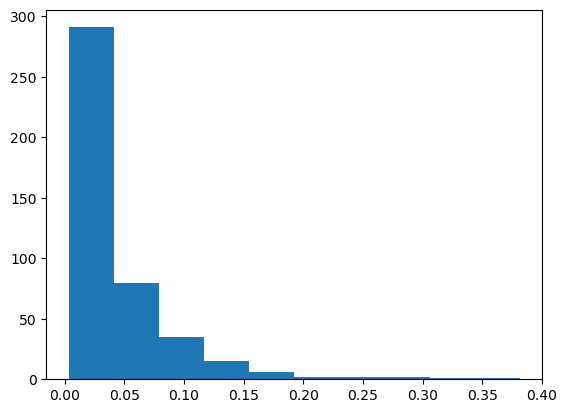

In [16]:
plt.hist(compOthers)

In [12]:
print(self_mean,self_std)
print(others_mean,others_std)

0.019406737178411793 0.023356331711446972
0.04385526298828847 0.04722263898287849


In [5]:

mesh = o3d.io.read_triangle_mesh(mesh_dir + "T0.obj")


In [6]:
mesh

TriangleMesh with 252 points and 500 triangles.

In [7]:
sim_mesh = o3d.geometry.TriangleMesh.simplify_quadric_decimation(mesh, 250)

In [8]:
sim_mesh

TriangleMesh with 127 points and 250 triangles.

In [9]:
sim_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([sim_mesh])


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


KeyboardInterrupt: 